In [1]:
# !pip3 install gensim

In [2]:
from Corpora import MovieReviewCorpus
from Lexicon import SentimentLexicon
from Statistics import SignTest
from Classifiers import NaiveBayesText, SVMText
from Extensions import SVMDoc2Vec, DocFeaturizer

In [3]:
# retrieve corpus
corpus=MovieReviewCorpus(stemming=False,pos=False)

# use sign test for all significance testing
signTest=SignTest()

print("--- classifying reviews using sentiment lexicon  ---")

# read in lexicon
lexicon=SentimentLexicon()

# on average there are more positive than negative words per review (~7.13 more positive than negative per review)
# to take this bias into account will use threshold (roughly the bias itself) to make it harder to classify as positive
# todo: vary this!!! 
threshold=8

# NOTE: from katie to self -- play w/ changing the threshold value! 

# question 0.1
lexicon.classify(corpus.reviews,threshold,magnitude=False)
token_preds=lexicon.predictions
print(f"token-only results: {lexicon.getAccuracy():.2f}")

lexicon.classify(corpus.reviews,threshold,magnitude=True)
magnitude_preds=lexicon.predictions
print(f"magnitude results: {lexicon.getAccuracy():.2f}")

# question 0.2
p_value=signTest.getSignificance(token_preds,magnitude_preds)
significance = "significant" if p_value < 0.05 else "not significant"
print(f"magnitude lexicon results are {significance} with respect to token-only")

num train: 1800, num test: 200
tot num reviews: 2000
--- classifying reviews using sentiment lexicon  ---
token-only results: 0.68
magnitude results: 0.69
magnitude lexicon results are not significant with respect to token-only


In [4]:
# question 1.0
print("--- classifying reviews using Naive Bayes on held-out test set ---")
NB=NaiveBayesText(smoothing=False,bigrams=False,trigrams=False,discard_closed_class=False)
NB.train(corpus.train)
NB.test(corpus.test)
# store predictions from classifier
non_smoothed_preds=NB.predictions
print(f"Accuracy without smoothing: {NB.getAccuracy():.2f}")

--- classifying reviews using Naive Bayes on held-out test set ---
Accuracy without smoothing: 0.43


In [5]:
# question 2.0
# use smoothing
NB=NaiveBayesText(smoothing=True,bigrams=False,trigrams=False,discard_closed_class=False)
NB.train(corpus.train)
NB.test(corpus.test)
smoothed_preds=NB.predictions
# saving this for use later
num_non_stemmed_features=len(NB.vocabulary)
print(f"Accuracy using smoothing: {NB.getAccuracy():.2f}")

# question 2.1
# see if smoothing significantly improves results
p_value=signTest.getSignificance(non_smoothed_preds,smoothed_preds)
significance = "significant" if p_value < 0.05 else "not significant"
print(f"results using smoothing are {significance} with respect to no smoothing")

Accuracy using smoothing: 0.79
results using smoothing are significant with respect to no smoothing


In [6]:
# question 3.0
print("--- classifying reviews using 10-fold cross-evaluation ---")
# using previous instantiated object
NB.crossValidate(corpus)
# using cross-eval for smoothed predictions from now on
smoothed_preds=NB.predictions
print(f"Accuracy: {NB.getAccuracy(cross_val_preds=True):.3f}")
print(f"Std. Dev: {NB.getStdDeviation()}")

--- classifying reviews using 10-fold cross-evaluation ---


/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])


Accuracy: 0.809
Std. Dev: 0.021731313812100698


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbdf622f190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbdf622f850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbdf6212df0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbdf622ff10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbdf623a2b0>],
 'means': []}

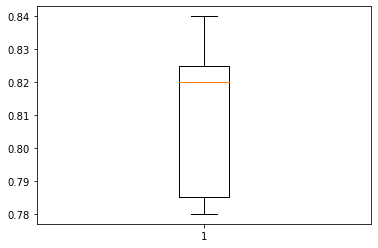

In [7]:
import matplotlib.pyplot as plt
plt.boxplot(NB.score_per_fold)

In [16]:
stemmed_corpus.stemming

True

In [25]:
# question 4.0
print("--- stemming corpus ---")
# retrieve corpus with tokenized text and stemming (using porter)
stemmed_corpus=MovieReviewCorpus(stemming=True,pos=False)
print("--- cross-validating NB using stemming ---")
NB.crossValidate(stemmed_corpus)
stemmed_preds=NB.predictions
print(f"Accuracy: {NB.getAccuracy(cross_val_preds=True):.3f}")
print(f"Std. Dev: {NB.getStdDeviation():.3f}")

# TODO Q4.1
# see if stemming significantly improves results on smoothed NB (both did cv)
p_value=signTest.getSignificance(stemmed_preds,smoothed_preds) # note compared against version w/ smoothing! 
significance = "significant" if p_value < 0.05 else "not significant"
print(f"results using stemming are {significance} with respect to no stemming")

# TODO Q4.2
print("--- determining the number of features before/after stemming ---")
# (**) changing the number of features == changing the number of words in the vocab 
NB.train(stemmed_corpus.train)
NB.test(stemmed_corpus.test)
num_stemmed_features = len(NB.vocabulary)
print(f"num features, non-stemmed: {num_non_stemmed_features} vs. num features, stemmed: {num_stemmed_features}")

--- stemming corpus ---
num train: 1800, num test: 200
tot num reviews: 2000
--- cross-validating NB using stemming ---
Accuracy: 0.815
Std. Dev: 0.022
results using stemming are not significant with respect to no stemming
--- determining the number of features before/after stemming ---
num features, non-stemmed: 52777 vs. num features, stemmed: 32611


In [24]:
stemmed_corpus.test[0]

['POS',
 ['apollo',
  '13',
  'is',
  'simpli',
  'one',
  'of',
  'the',
  'most',
  'dramat',
  'film',
  'thi',
  'summer',
  '-lrb-',
  'apart',
  'from',
  'swashbuckl',
  'braveheart',
  '-rrb-',
  '.',
  'director',
  '-lrb-',
  'and',
  'former',
  'actor',
  '-rrb-',
  'ron',
  'howard',
  '-lrb-',
  'splash',
  ',',
  'backdraft',
  ',',
  'far',
  '&',
  'away',
  '-rrb-',
  ',',
  'most',
  'note',
  'for',
  'hi',
  'dramat',
  'film',
  'make',
  ',',
  'display',
  'again',
  'hi',
  'brillianc',
  'in',
  'creat',
  'drama',
  'and',
  'suspens',
  'in',
  'apollo',
  '13',
  '.',
  'be',
  'the',
  'second',
  'largest',
  'box',
  'offic',
  'hit',
  'in',
  'the',
  'us',
  'thi',
  'summer',
  '-lrb-',
  'with',
  'more',
  'than',
  'us$',
  '150',
  'million',
  'in',
  'the',
  'state',
  'alon',
  '-rrb-',
  ',',
  'thi',
  'film',
  'is',
  'hi',
  'most',
  'success',
  'effort',
  'yet',
  '.',
  'perhap',
  'one',
  'of',
  'the',
  'most',
  'appeal',
  'fe

In [9]:
# question Q5.0
# cross-validate model using smoothing and bigrams
print("--- cross-validating naive bayes using smoothing and bigrams ---")
NB=NaiveBayesText(smoothing=True,bigrams=True,trigrams=False,discard_closed_class=False)
NB.crossValidate(corpus)
smoothed_and_bigram_preds=NB.predictions
print(f"Accuracy: {NB.getAccuracy(cross_val_preds=True):.2f}") 
print(f"Std. Dev: {NB.getStdDeviation():.2f}")


# see if bigrams significantly improves results on smoothed NB only
p_value=signTest.getSignificance(smoothed_preds,smoothed_and_bigram_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results using smoothing and bigrams are {signifance} with respect to smoothing only")


# TODO Q5.1
# katie: from q3 (num_non_stemmed_features)
num_bow_features = len(NB.vocabulary)
print(f"num features for [model] (Q3): {num_non_stemmed_features} vs. num features BoW: {num_bow_features}")

--- cross-validating naive bayes using smoothing and bigrams ---
Accuracy: 0.83
Std. Dev: 0.02
results using smoothing and bigrams are not significant with respect to smoothing only
num features for [model] (Q3): 52777 vs. num features BoW: 502089


In [10]:
# TODO Q6 and 6.1
print("--- classifying reviews using SVM 10-fold cross-eval ---")
SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=False)
SVM.crossValidate(corpus)
svm_preds=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy(cross_val_preds=True):.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")

--- classifying reviews using SVM 10-fold cross-eval ---


/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

Accuracy: 0.82
Std. Dev: 0.02


In [11]:
# # TODO Q6 and 6.1
# corpus = MovieReviewCorpus(stemming=False,pos=False,use_imdb=True)
# print("--- classifying reviews using SVM 10-fold cross-eval ---")
# SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=False)
# SVM.train(corpus.train)
# SVM.test(corpus.test)
# svm_preds=SVM.predictions
# print(f"Accuracy: {SVM.getAccuracy():.2f}") 
# print(f"Std. Dev: {SVM.getStdDeviation():.2f}")

In [12]:
p_value=signTest.getSignificance(svm_preds,smoothed_and_bigram_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results using svm {signifance} with respect to naive bayes")

results using svm not significant with respect to naive bayes


In [13]:
# TODO Q7.0
print("--- adding in POS information to corpus ---")
pos_corpus=MovieReviewCorpus(stemming=False,pos=True)
print("--- training svm on word+pos features ----")
SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=False)
SVM.crossValidate(pos_corpus)
svm_pos_preds=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy(cross_val_preds=True):.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")
p_value=signTest.getSignificance(svm_pos_preds,svm_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results using pos tags {signifance} with respect to not using pos tags")

--- adding in POS information to corpus ---
num train: 1800, num test: 200
tot num reviews: 2000
--- training svm on word+pos features ----


/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

Accuracy: 0.81
Std. Dev: 0.02
results using pos tags not significant with respect to not using pos tags


In [14]:
# TODO: QUESTION 7.1
print("--- training svm discarding closed-class words ---") # QUESTION: do we not use POS here??
SVM=SVMText(bigrams=True,trigrams=False,discard_closed_class=True)
SVM.crossValidate(corpus)
svm_preds_closed=SVM.predictions
print(f"Accuracy: {SVM.getAccuracy(cross_val_preds=True):.2f}") 
print(f"Std. Dev: {SVM.getStdDeviation():.2f}")
p_value=signTest.getSignificance(svm_preds_closed,svm_preds)
signifance = "significant" if p_value < 0.05 else "not significant"
print(f"results discarding closed class {signifance} with respect to keeping the closed class")

--- training svm discarding closed-class words ---


/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_files = np.array([np.array(corpus.folds[fold_j]) for fold_j in range(num_folds) if fold_j != fold_i])
/Users/kcollins/MLMI13/Analysis.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarray

Accuracy: 0.82
Std. Dev: 0.01
results discarding closed class not significant with respect to keeping the closed class
